In [1]:
import numpy
import seaborn as sns
from bootstrapper import Bootstrapper

## English description
To conduct a hypothesis testing, you have to generate bootstrap samples that follows the null hypothesis distribution.
In this case it's $H_0 : \mu_x = \mu_y$.
As bootstrap method is non-parametric, you have to generate it by using the empirical distribution.
We are only interested in the mean difference this time, modify the two samples so that they have the equal mean.
This mean is called 'pooled mean' and calculated as $\overline{z} = \frac{n\overline{x} + m\overline{y}}{n + m}$.
You can draw bootstrap samples from null hypothesis distribution by converting the two samples as
$$ x^+ = x - \overline{x} + \overline{z} $$
$$ y^+ = y - \overline{y} + \overline{z} $$

## 日本語での説明
仮説検定を行うためには、帰無仮説に従うブートストラップ・サンプリングを生成する必要があります。
この場合、帰無仮説は$H_0: \mu_x = \mu_y$です。
ブートスラップ法はノンパラメトリックなので、経験分布のみから帰無仮説に従うサンプルを生成しなければなりません。
今興味があるのは平均の差異だけですから、2つのサンプルの平均がある同じ値$\overline{z}$であるという条件を満たすサンプルを生成します。
この平均$\overline{z}$は「プールされた平均」と呼ばれ$\overline{z} = \frac{n\overline{x} + m\overline{y}}{n + m}$と定義されます。
これは$x$と$y$の2つのサンプルを結合したサンプルの平均と等しくなります。
標本を次のように変換し、帰無仮説を満たす母集団からの標本抽出を行います。
$$ x^+ = x - \overline{x} + \overline{z} $$
$$ y^+ = y - \overline{y} + \overline{z} $$

In [3]:
x = numpy.random.power(0.02, 1_000)
y = numpy.random.power(0.01, 1_000)
print('mean(x) = {}\nmean(y) = {}'.format(x.mean(), y.mean())) # x should have larger mean

def t_stat(s1, s2):
    mean1, mean2 = s1.mean(), s2.mean()
    var1, var2 = numpy.var(s1), numpy.var(s2)
    n1, n2 = s1.shape[0], s2.shape[0]
    return (mean1 - mean2) / numpy.sqrt(var1 / (n1 - 1) + var2 / (n2 - 1))

t_stat_sample = t_stat(x, y)
print('T(x, y) = {}'.format(t_stat_sample))

bs = Bootstrapper(bootstrap_count=1_000)
pooled_mean = numpy.concatenate([x, y]).mean()
xplus = numpy.random.choice(x - x.mean() + pooled_mean, x.shape, replace=True)
yplus = numpy.random.choice(y - y.mean() + pooled_mean, y.shape, replace=True)
t_stat_boot = bs.run(t_stat, xplus, yplus)
pvalue = (t_stat_boot >= t_stat_sample).sum() / len(t_stat_boot)
print('p-value = {}'.format(pvalue))

mean(x) = 0.021607836437292107
mean(y) = 0.012193816556083367
T(x, y) = 2.2993627384276847
p-value = 0.012


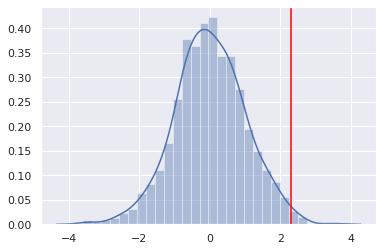

In [4]:
sns.set()
ax = sns.distplot(t_stat_boot, kde=True)
ax.axvline(x=t_stat_sample, color='red');